# COVID-19 
(Previously known as nCoV-2019)
<img src='https://ars.els-cdn.com/content/image/3-s2.0-B9780443073670000409-f040-001-9780443073670.jpg'>

<b>Overview:</b> <br>
Model the growth of the COVID-19 viral infections in mainland China and outside the mainland.

<b>Data Source:</b> <br>
https://en.m.wikipedia.org/wiki/Timeline_of_the_2019–20_Wuhan_coronavirus_outbreak <br>
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml <br>
https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/ <br>
https://www.thelancet.com/pb-assets/Lancet/pdfs/S0140673620302117.pdf <br>
Clinical outcome (99 Cases)
<li> Remained in hospital 57 (58%)
<li> Discharged 31 (31%)
<li> Died 11 (11%)
<br>
https://jamanetwork.com/journals/jama/fullarticle/2761044 <br>
<li>In this single-center case series of 138 hospitalized patients with confirmed NCIP in Wuhan, China, presumed hospital-related transmission of 2019-nCoV was suspected in 41% of patients, 26% of patients received ICU care, and mortality was 4.3%.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 28 08:19:13 2020
"""
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
#import packages
import smtx_ncov as sm
import pandas as pd
import numpy as np
import xlrd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from tabulate import tabulate
from matplotlib import style
from matplotlib.pylab import rcParams
style.use('fivethirtyeight')
# style.use('ggplot')

In [2]:
c_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
f_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
r_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [3]:
c_csv=pd.read_csv(c_url)
f_csv=pd.read_csv(f_url)
r_csv=pd.read_csv(r_url)

In [4]:
def covid_clean(df):
    c_csv=df
    
    c_csv["Province/State"]=c_csv["Province/State"].fillna('-')
    c_csv["Country"]=c_csv["Province/State"]+" "+c_csv["Country/Region"]
    c_csv.drop(['Province/State','Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
    c_csv=c_csv.T
    recs = len(c_csv)-1
    c_csv.columns = c_csv.iloc[recs]
    c_csv=c_csv.drop(c_csv.index[recs])
    return c_csv

In [5]:
c_df=covid_clean(c_csv)
f_df=covid_clean(f_csv)
r_df=covid_clean(r_csv)

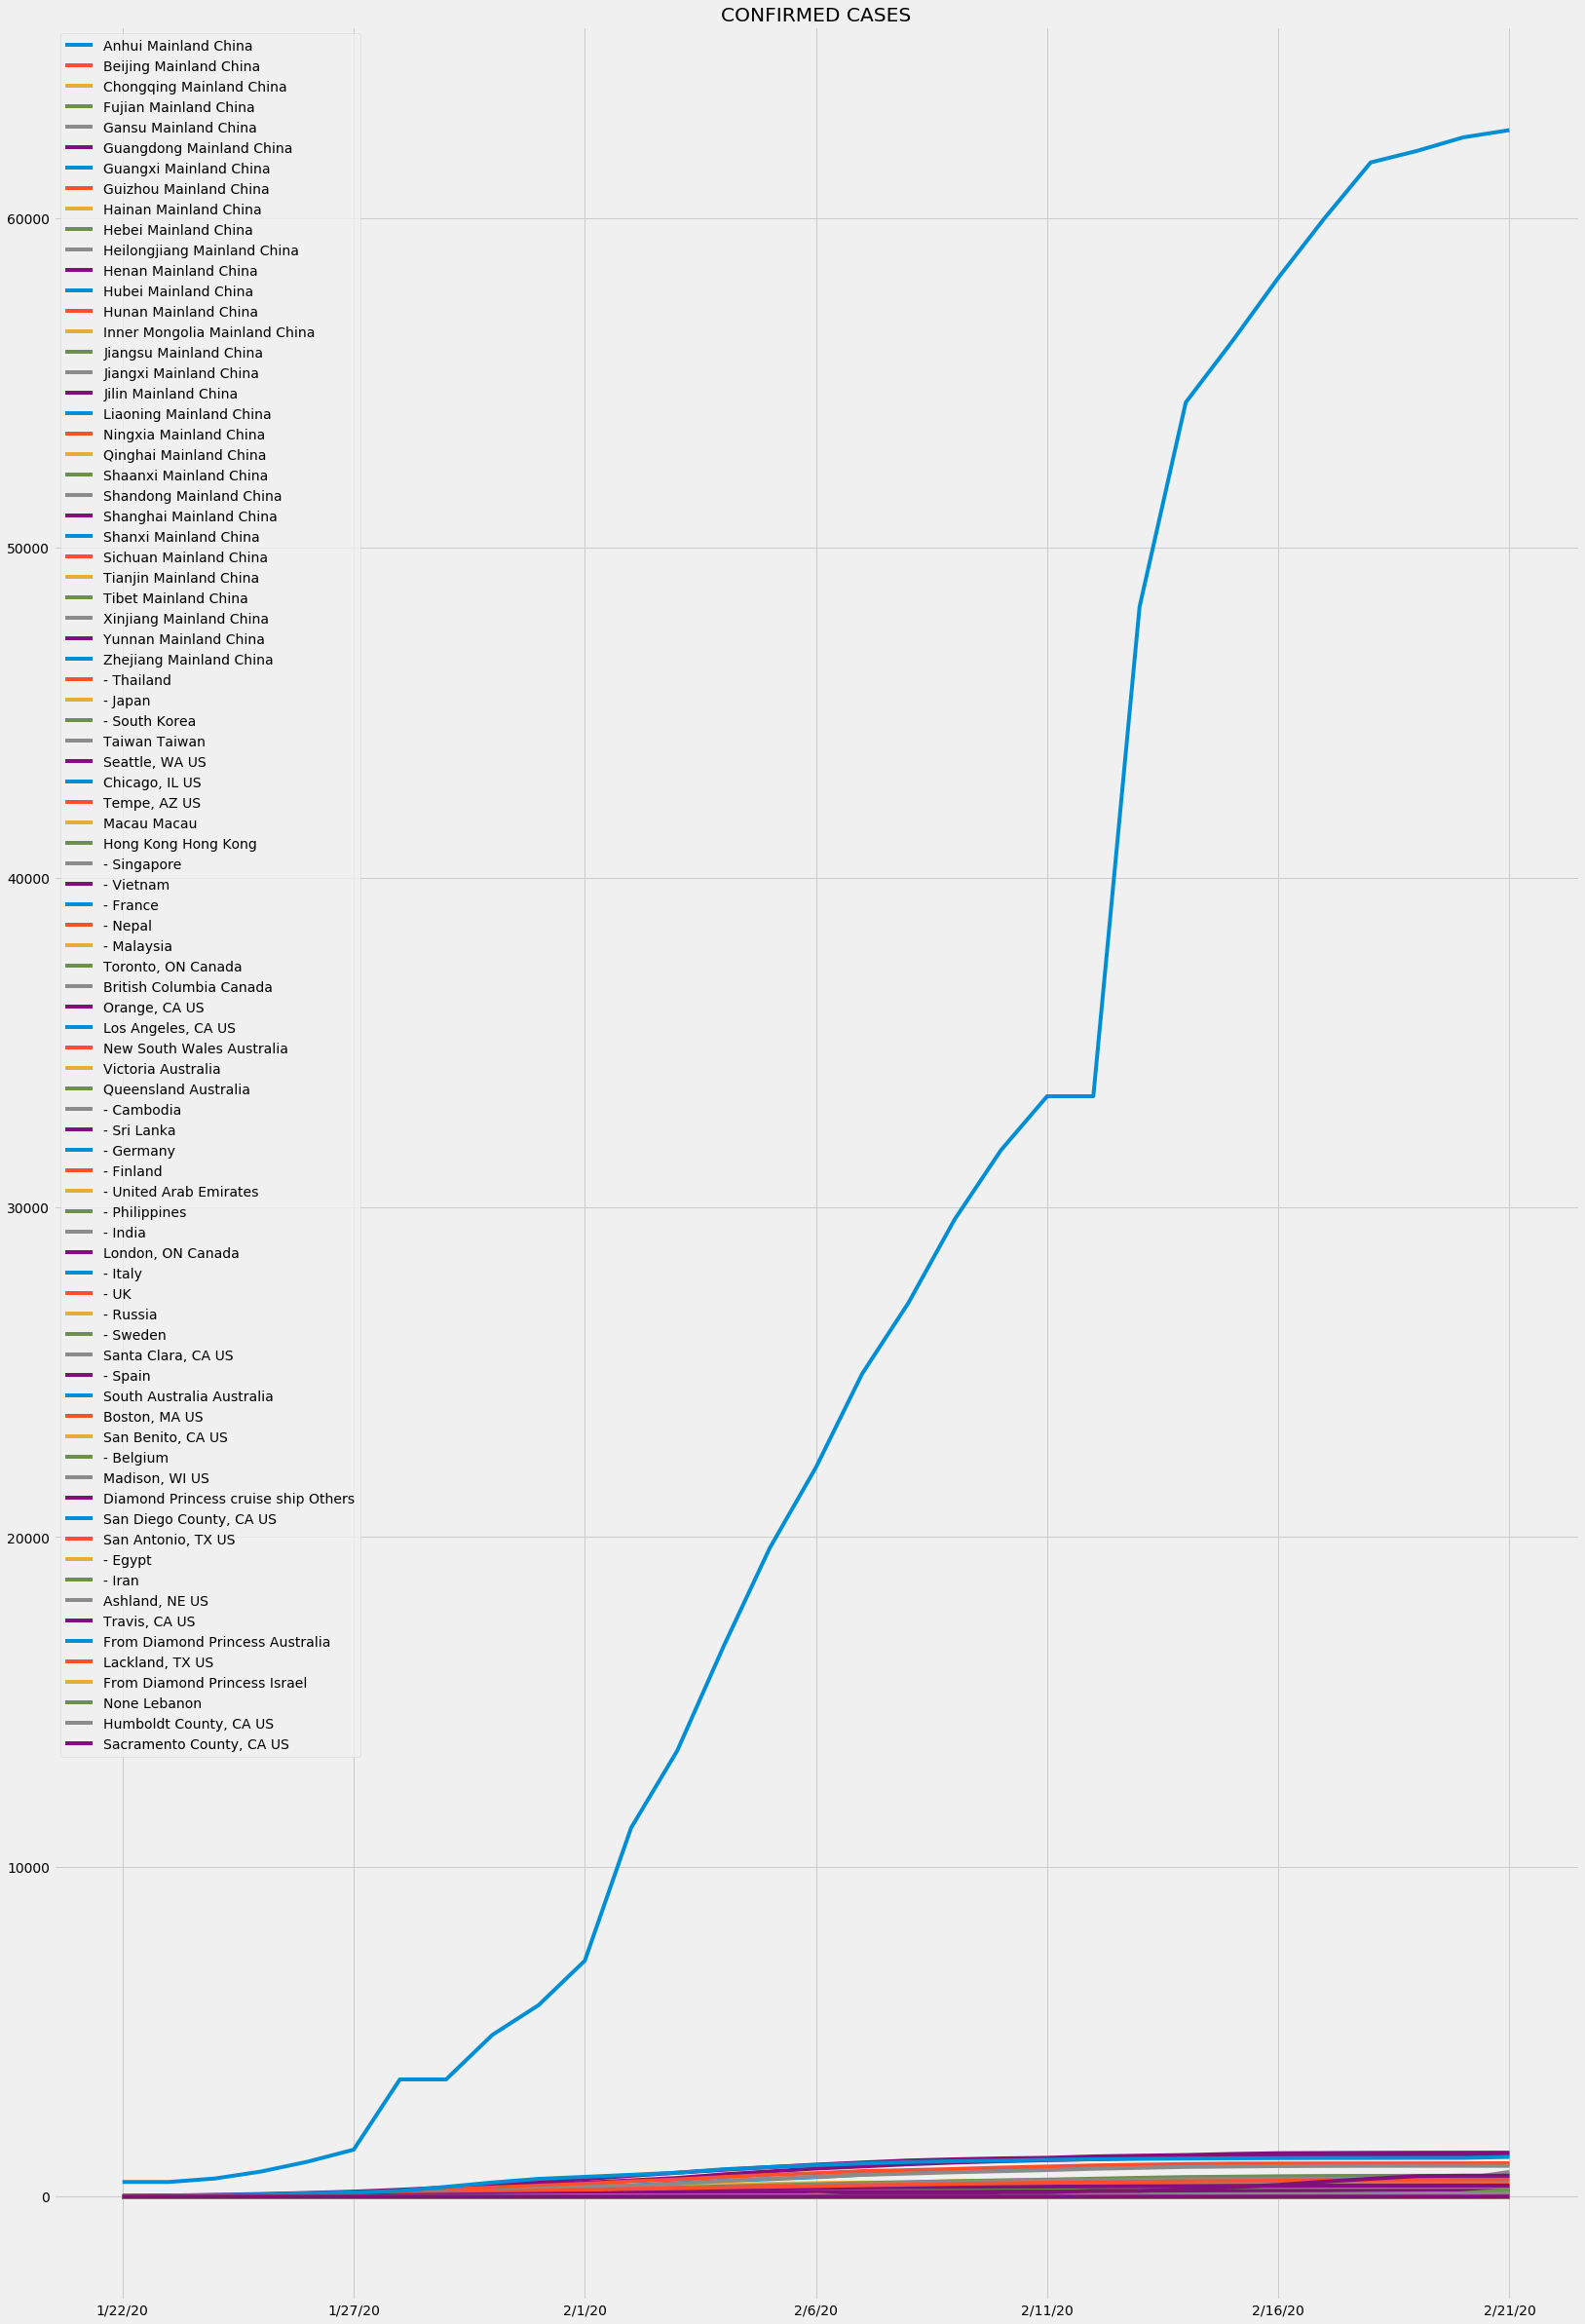

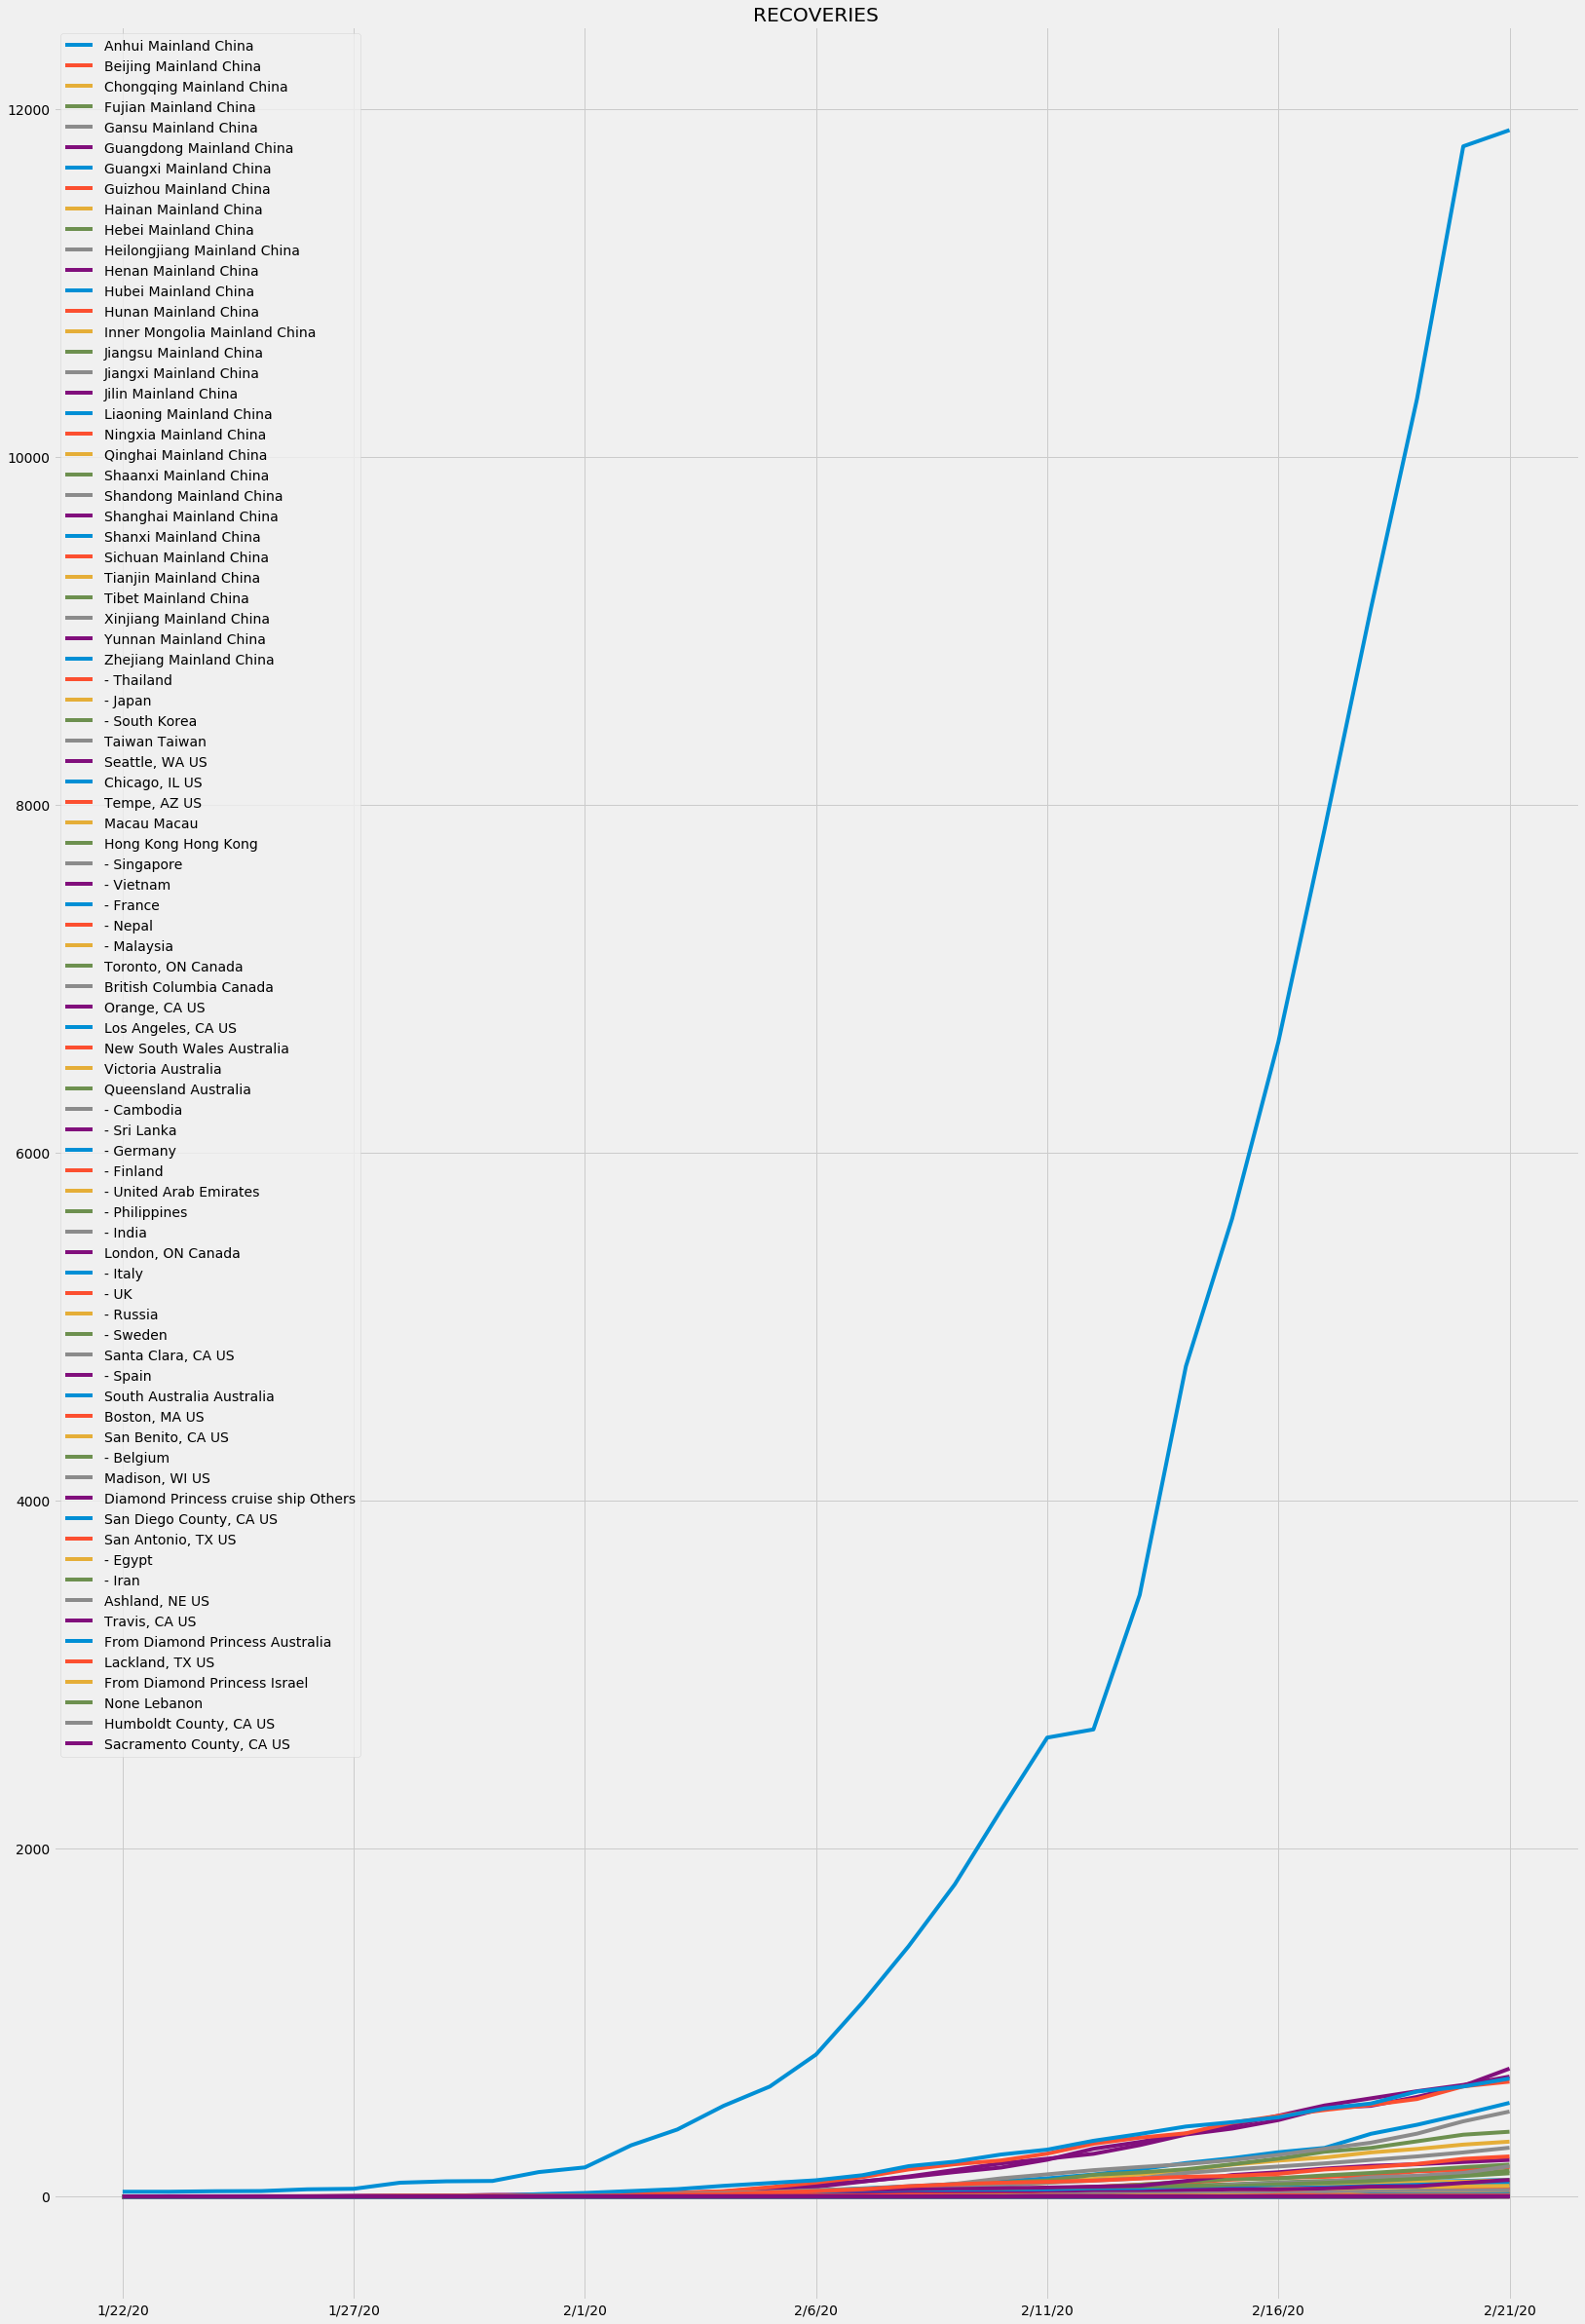

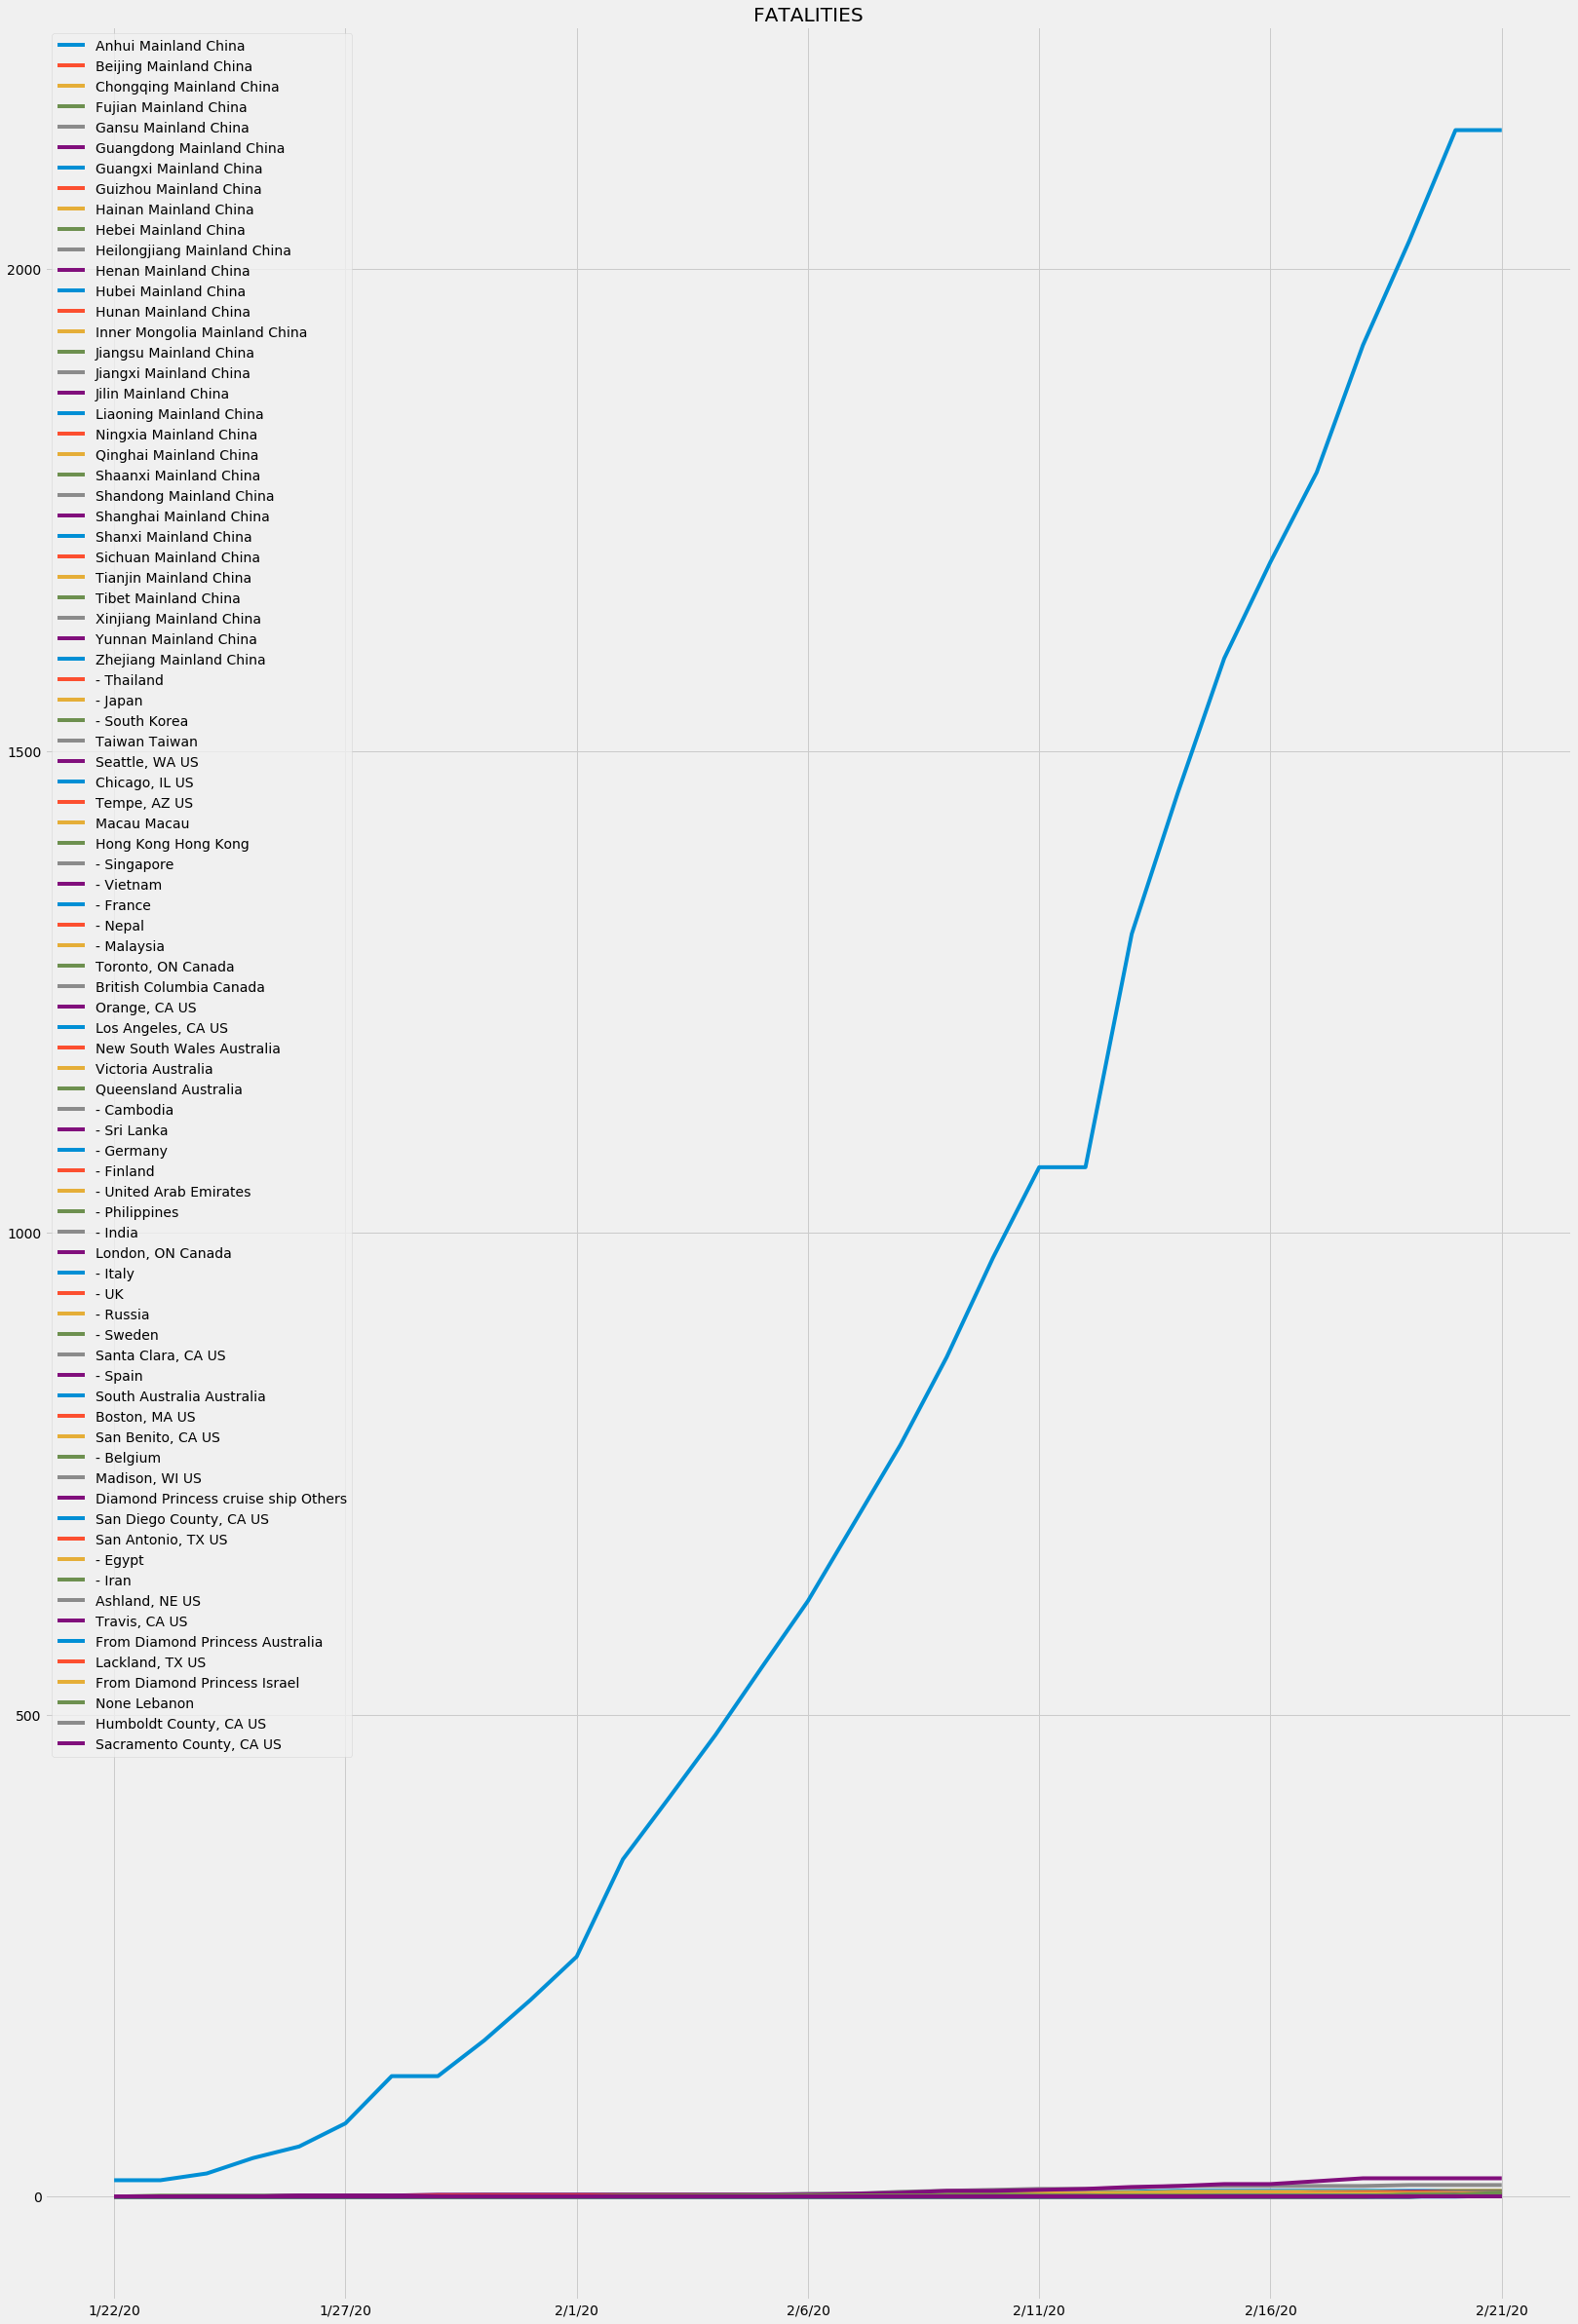

In [6]:
rcParams['figure.figsize'] = 25,40
# c_csv.plot(xticks=c_csv.index)
c_df.plot(title='CONFIRMED CASES')
plt.legend()
plt.show()

r_df.plot(title='RECOVERIES')
plt.legend()
plt.show()

f_df.plot(title='FATALITIES')
plt.legend()
plt.show()

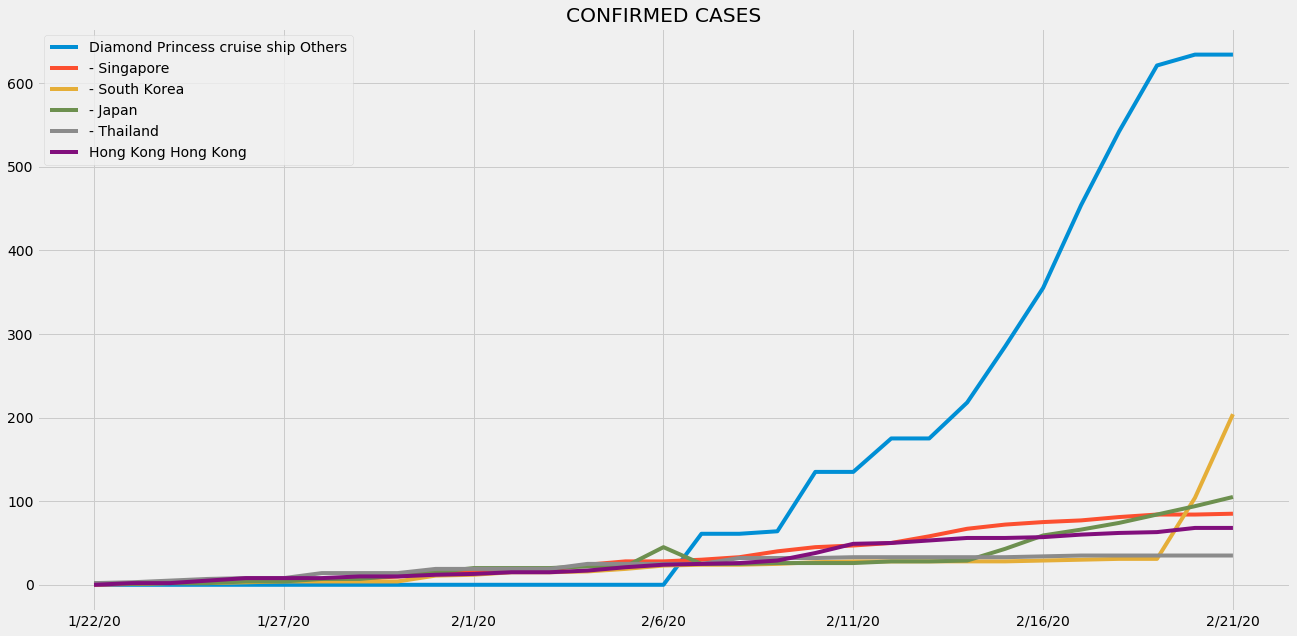

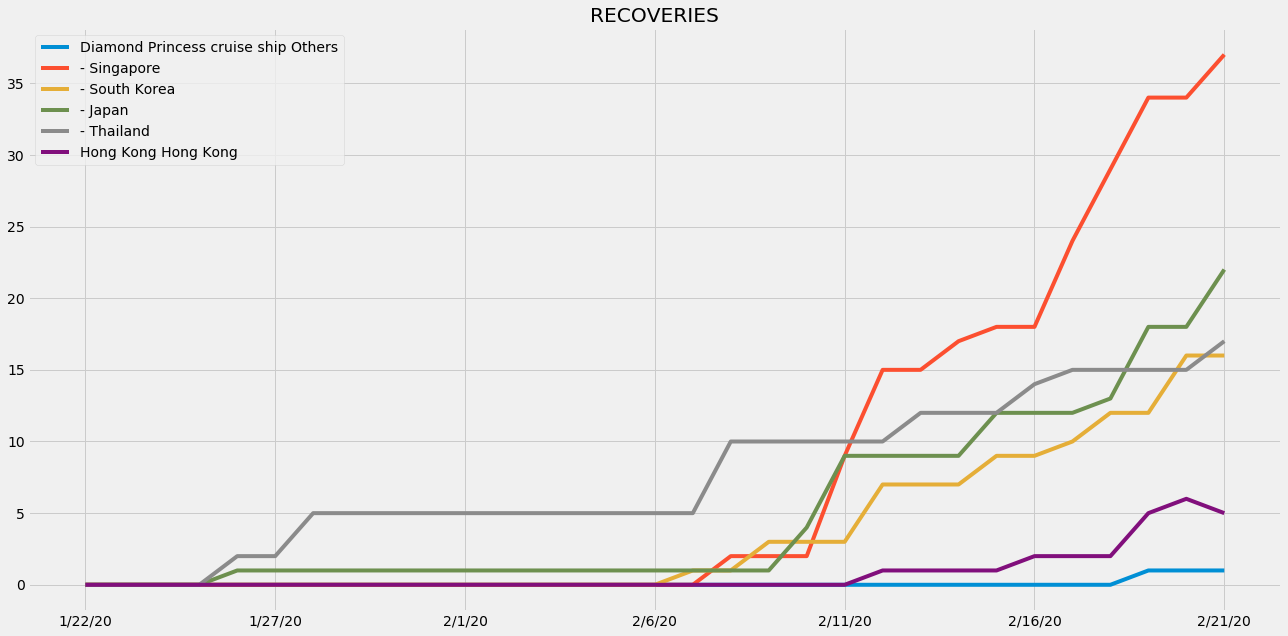

In [7]:
rcParams['figure.figsize'] = 20,10
# c_csv.plot(xticks=c_csv.index)

c_df['Diamond Princess cruise ship Others'].plot(title='CONFIRMED CASES')
c_df['- Singapore'].plot()
c_df['- South Korea'].plot()
c_df['- Japan'].plot()
c_df['- Thailand'].plot()
c_df['Hong Kong Hong Kong'].plot()
plt.legend()
plt.show()

r_df['Diamond Princess cruise ship Others'].plot(title='RECOVERIES')
r_df['- Singapore'].plot()
r_df['- South Korea'].plot()
r_df['- Japan'].plot()
r_df['- Thailand'].plot()
r_df['Hong Kong Hong Kong'].plot()

plt.legend()
plt.show()

In [8]:
c_latest = c_df
c_latest.sum(axis=1)

1/22/20      555.0
1/23/20      653.0
1/24/20      941.0
1/25/20     1434.0
1/26/20     2118.0
1/27/20     2927.0
1/28/20     5578.0
1/29/20     6166.0
1/30/20     8234.0
1/31/20     9927.0
2/1/20     12038.0
2/2/20     16787.0
2/3/20     19881.0
2/4/20     23892.0
2/5/20     27636.0
2/6/20     30818.0
2/7/20     34392.0
2/8/20     37121.0
2/9/20     40151.0
2/10/20    42763.0
2/11/20    44803.0
2/12/20    45222.0
2/13/20    60370.0
2/14/20    66887.0
2/15/20    69032.0
2/16/20    71226.0
2/17/20    73260.0
2/18/20    75138.0
2/19/20    75641.0
2/20/20    76199.0
2/21/20    76843.0
dtype: float64

In [9]:
c_df['- South Korea'].tail(1)

2/21/20    204
Name: - South Korea, dtype: object

In [16]:
c_df['- South Korea']

2020-01-22      1
2020-01-23      1
2020-01-24      2
2020-01-25      2
2020-01-26      3
2020-01-27      4
2020-01-28      4
2020-01-29      4
2020-01-30      4
2020-01-31     11
2020-02-01     12
2020-02-02     15
2020-02-03     15
2020-02-04     16
2020-02-05     19
2020-02-06     23
2020-02-07     24
2020-02-08     24
2020-02-09     25
2020-02-10     27
2020-02-11     28
2020-02-12     28
2020-02-13     28
2020-02-14     28
2020-02-15     28
2020-02-16     29
2020-02-17     30
2020-02-18     31
2020-02-19     31
2020-02-20    104
2020-02-21    204
Name: - South Korea, dtype: object

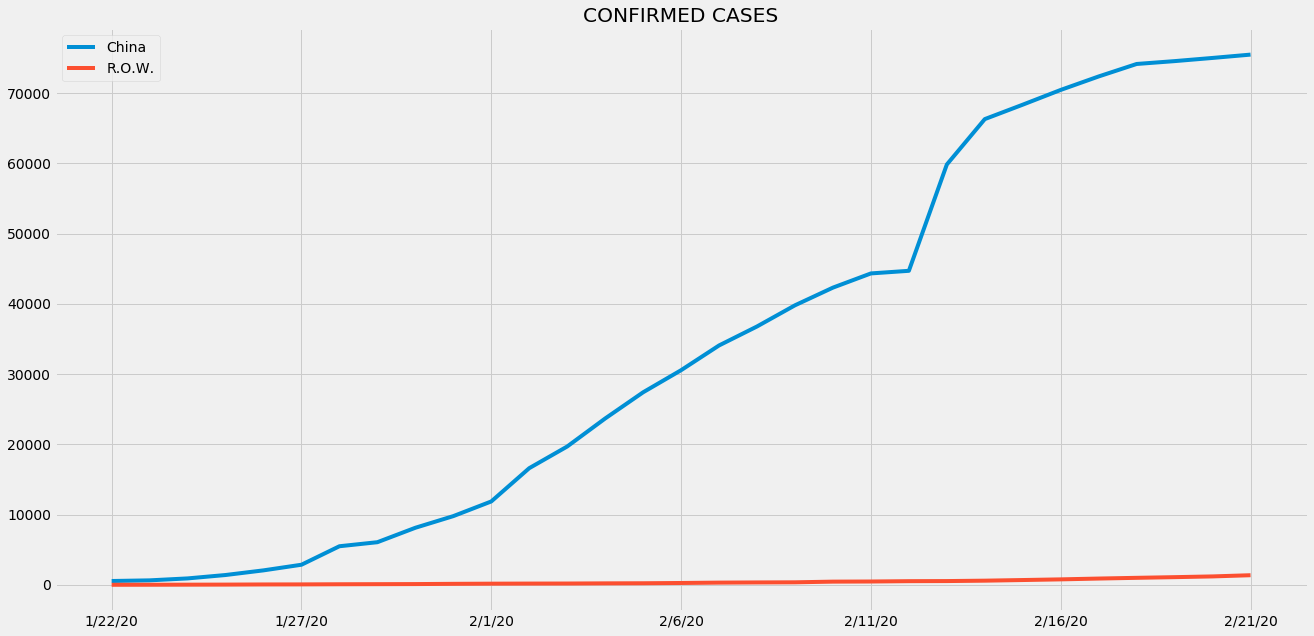

In [10]:
c_df.iloc[:,0:31].sum(axis=1).plot(label='China', title='CONFIRMED CASES')
c_df.iloc[:,31:].sum(axis=1).plot(label='R.O.W.')
plt.legend()
plt.show()

Reference Rates: https://en.wikipedia.org/wiki/List_of_human_disease_case_fatality_rates

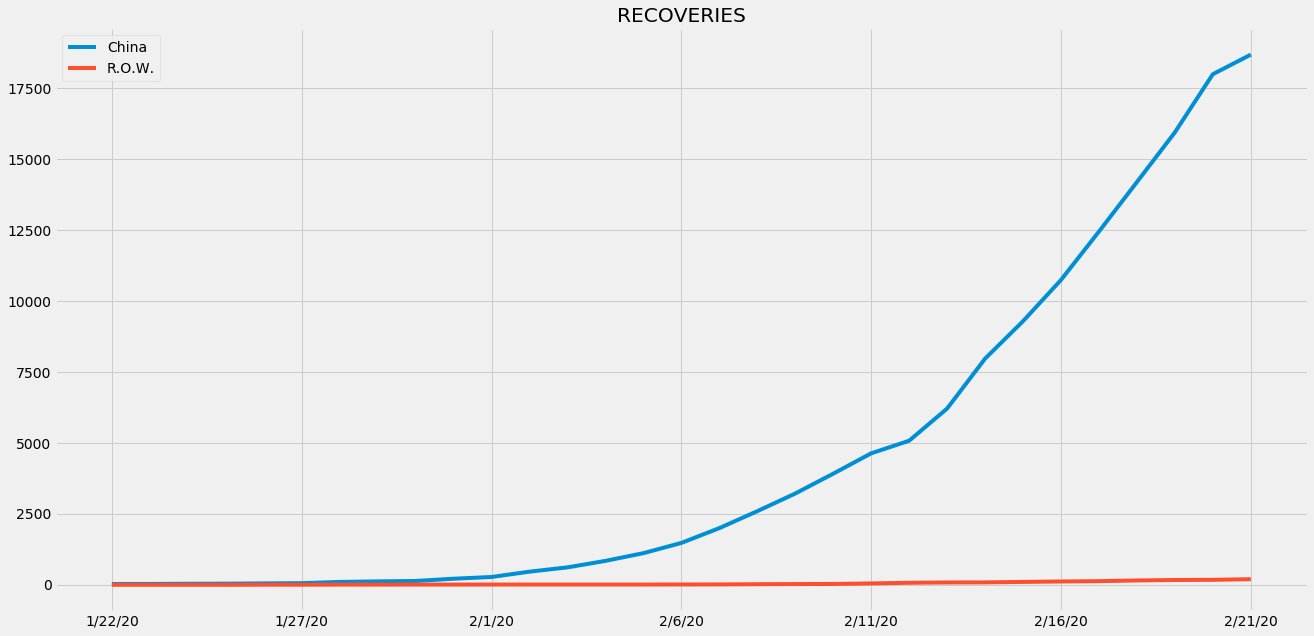

In [11]:
r_df.iloc[:,0:31].sum(axis=1).plot(label='China', title='RECOVERIES')
r_df.iloc[:,31:].sum(axis=1).plot(label='R.O.W.')
plt.legend()
plt.show()

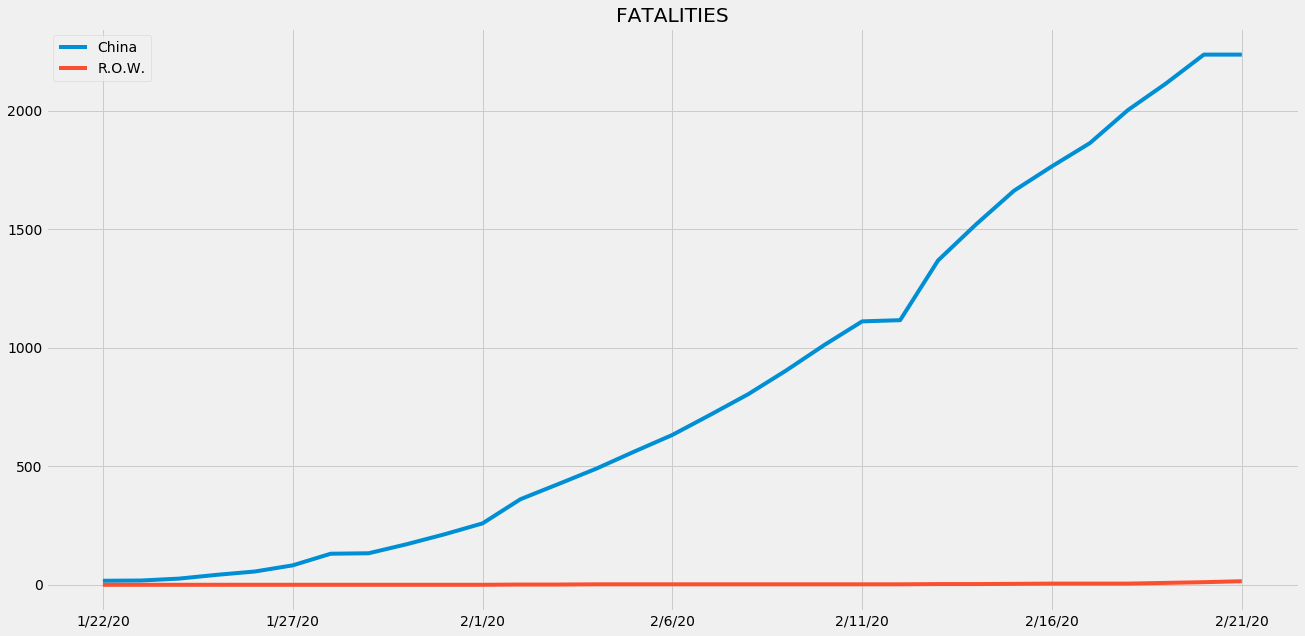

In [12]:
f_df.iloc[:,0:31].sum(axis=1).plot(label='China', title='FATALITIES')
f_df.iloc[:,31:].sum(axis=1).plot(label='R.O.W.')
plt.legend()
plt.show()

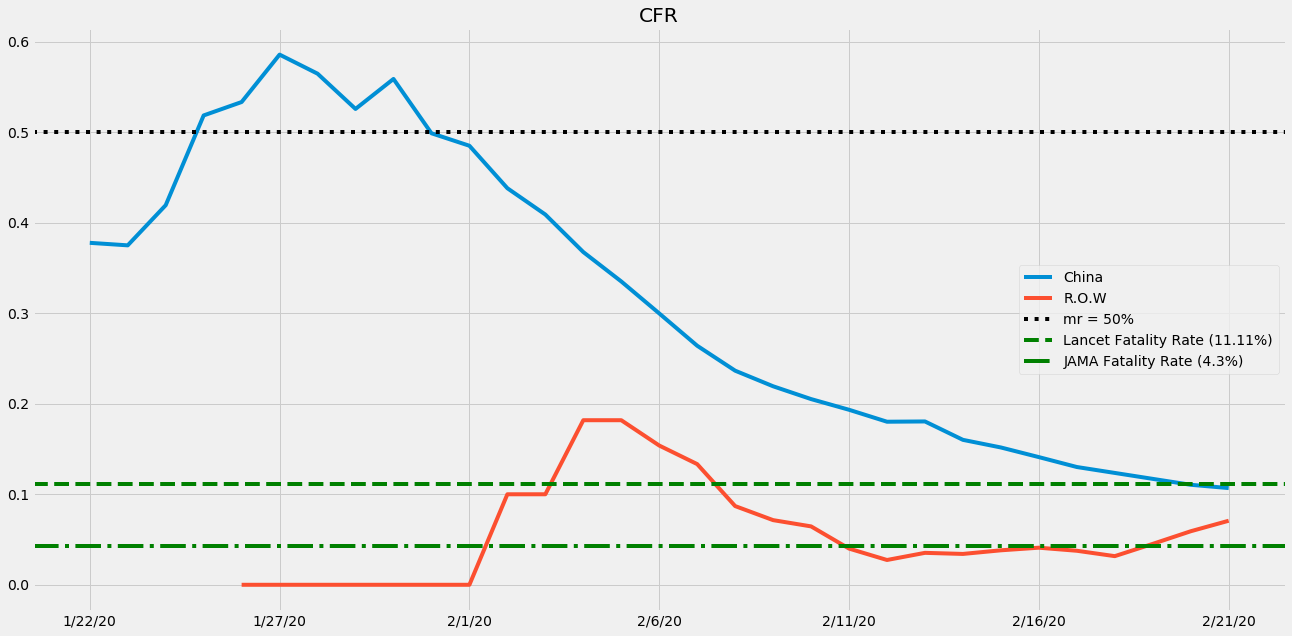

In [13]:
# f_df = f_df.set_index(pd.to_datetime(f_df.index))
((f_df.iloc[:,0:31].sum(axis=1))/
 (((f_df.iloc[:,0:31]).sum(axis=1))+((r_df.iloc[:,0:31]).sum(axis=1)))).plot(label='China', title='CFR')
((f_df.iloc[:,31:].sum(axis=1))/
 (((f_df.iloc[:,31:]).sum(axis=1))+((r_df.iloc[:,31:]).sum(axis=1)))).plot(label='R.O.W', title='CFR')

plt.axhline(y=0.5, color='black', linestyle=':', label = 'mr = 50%')
plt.axhline(y=11/99, color='green', linestyle='--', label = 'Lancet Fatality Rate (11.11%)')
plt.axhline(y=4.3/100, color='green', linestyle='-.', label = 'JAMA Fatality Rate (4.3%)')

plt.legend()
plt.show()

In [14]:
a=f_df.iloc[:,0:31]
b=r_df.iloc[:,0:31]

In [15]:
c_df = c_df.set_index(pd.to_datetime(c_df.index))